In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from obspy.core import read

In [4]:
byl_shallow = 'C:/Users/18603/work/classes/GPGN268/FP06-volcano-seismology/data/DataReleaseIP-135611/out/cwire_0.5-2hz_BYL_HHE_shallow.csv'

In [5]:
BYL_SHALLOW = pd.read_csv(byl_shallow)

In [6]:
BYL_SHALLOW.head()

,Date,dv/v,StdErr,Crosses,Density
0,2018-05-06 03:00:00,0.033309,0.0,1.0,1.0
1,2018-05-06 03:30:00,0.026304,0.0,1.0,0.0
2,2018-05-06 04:00:00,0.022917,0.0,1.0,0.0
3,2018-05-06 04:30:00,0.020930,0.0,1.0,0.0
4,2018-05-06 05:00:00,0.019497,0.0,1.0,0.0


In [7]:
bylshalv = np.array(BYL_SHALLOW["dv/v"])
bylshaldat = np.array(BYL_SHALLOW["Date"])
bylshalstd = np.array(BYL_SHALLOW["StdErr"])

s = bylshaldat.size
t = np.arange(s)
tnew = np.arange(0, s, 900)
k = np.array([])
for i in tnew:
    k = np.append(k, bylshaldat[i])

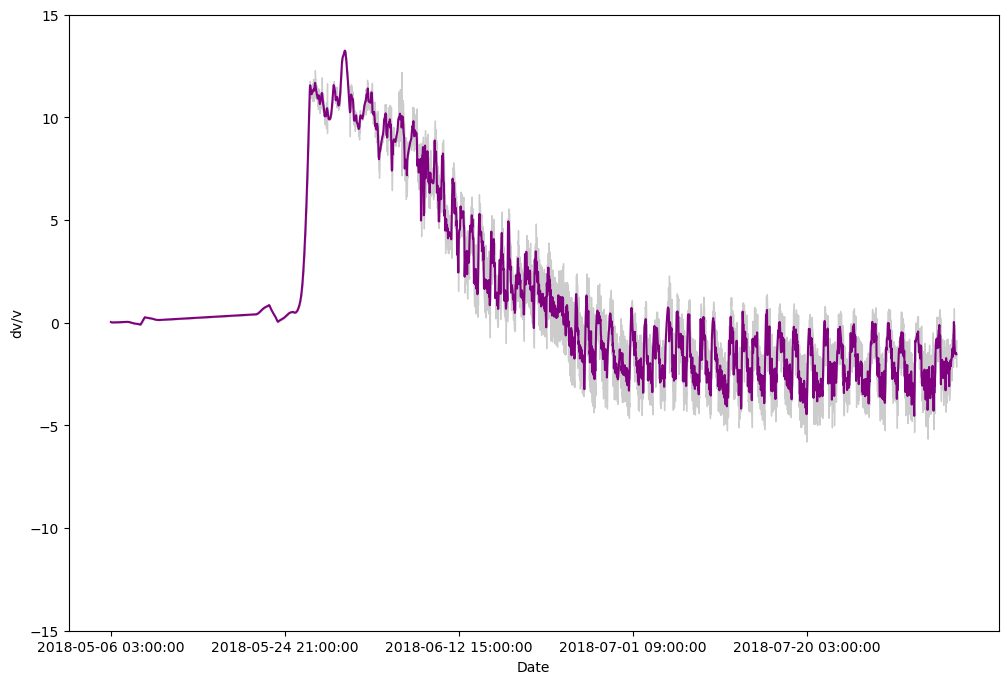

In [8]:
plt.figure(figsize = (12,8))
plt.plot(t, bylshalv, c="purple")
plt.ylabel("dv/v", rotation=90)
plt.xlabel("Date")
plt.xticks(ticks=tnew, labels=k)
plt.ylim(-15,15)
plt.fill_between(t, bylshalv + bylshalstd, bylshalv - bylshalstd, color=[0.8,0.8,0.8])
plt.show()

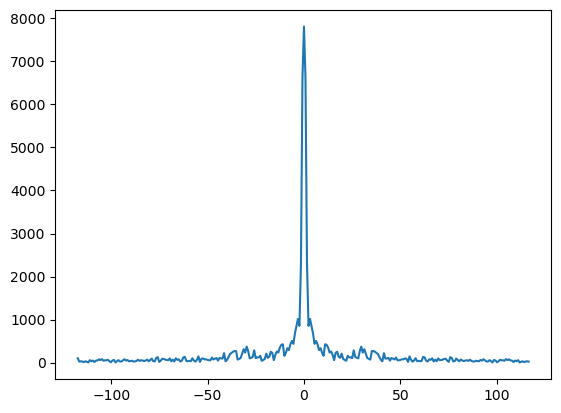

In [9]:
freqs = np.fft.fftshift(np.fft.fftfreq(3000-700, 1/1800))
plt.plot(freqs[1000:1300], abs(np.fft.fftshift(np.fft.fft(bylshalv[700:3000])))[1000:1300])